In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [9]:
dataset_path = "data/ovarian-cancer-classification-dataset/Test_Images"

In [11]:
data = []

for label in os.listdir(dataset_path):
    
    sub_dir = os.path.join(dataset_path, label)
    
    if os.path.isdir(sub_dir):
    
        for file_name in os.listdir(sub_dir):
            
            file_path = os.path.join(sub_dir, file_name)
            
            data.append([file_path, label])

df = pd.DataFrame(data, columns=['file_path', 'label'])

In [13]:
df.head()

,file_path,label
0,data/ovarian-cancer-classification-dataset/Tes...,CC
1,data/ovarian-cancer-classification-dataset/Tes...,CC
2,data/ovarian-cancer-classification-dataset/Tes...,CC
3,data/ovarian-cancer-classification-dataset/Tes...,CC
4,data/ovarian-cancer-classification-dataset/Tes...,CC


In [15]:
df.tail()

,file_path,label
3077,data/ovarian-cancer-classification-dataset/Tes...,MC
3078,data/ovarian-cancer-classification-dataset/Tes...,MC
3079,data/ovarian-cancer-classification-dataset/Tes...,MC
3080,data/ovarian-cancer-classification-dataset/Tes...,MC
3081,data/ovarian-cancer-classification-dataset/Tes...,MC


In [17]:
df.shape

(3082, 2)

In [19]:
df.columns

Index(['file_path', 'label'], dtype='object')

In [21]:
df.duplicated().sum()

0

In [23]:
df.isnull().sum()

file_path    0
label        0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  3082 non-null   object
 1   label      3082 non-null   object
dtypes: object(2)
memory usage: 48.3+ KB


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df['label'].unique()

array(['CC', 'EC', 'HGSC', 'LGSC', 'MC'], dtype=object)

In [31]:
df['label'].value_counts()

label
HGSC    1188
EC       733
CC       551
MC       323
LGSC     287
Name: count, dtype: int64

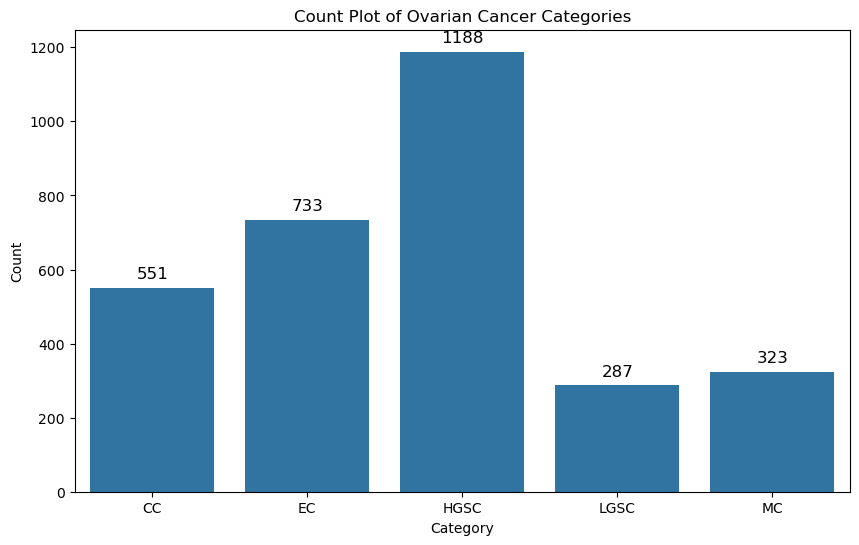

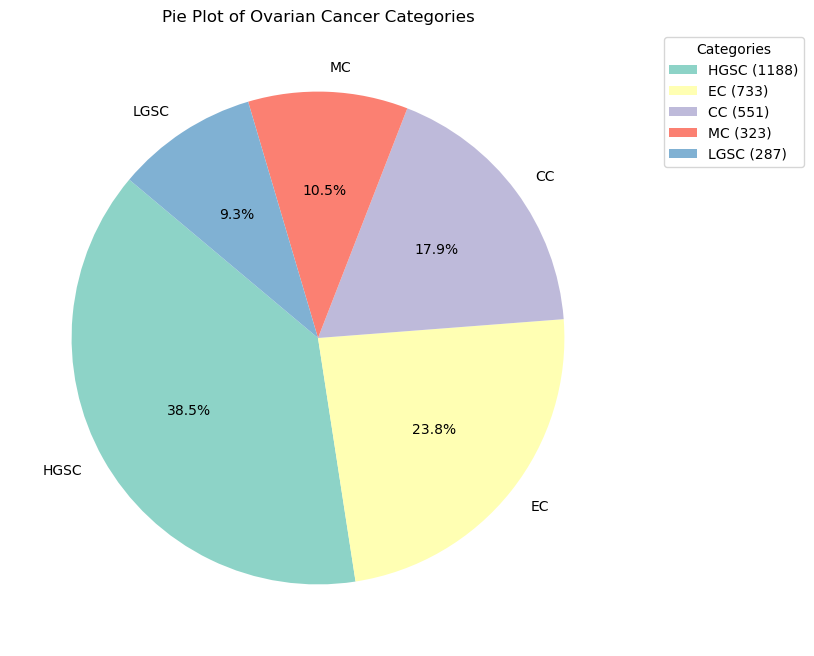

In [33]:
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='label', data=df)
plt.title("Count Plot of Ovarian Cancer Categories")
plt.xlabel("Category")
plt.ylabel("Count")

for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

plt.figure(figsize=(8, 8))
category_counts = df['label'].value_counts()
pie_plot = category_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Pie Plot of Ovarian Cancer Categories")
plt.ylabel("")  

labels_with_counts = [f'{label} ({count})' for label, count in zip(category_counts.index, category_counts.values)]
plt.legend(labels_with_counts, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

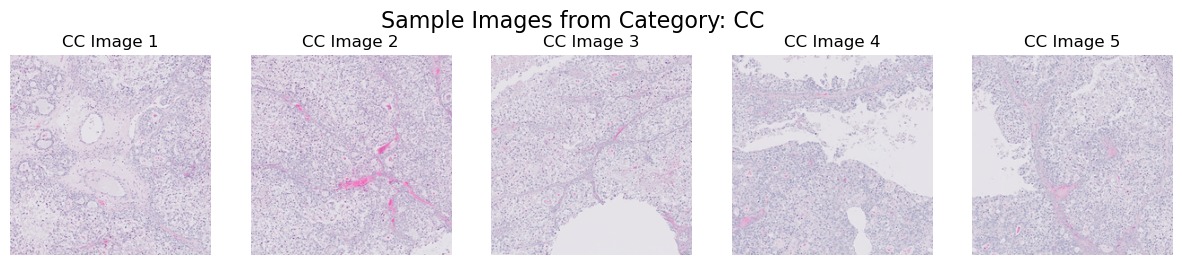

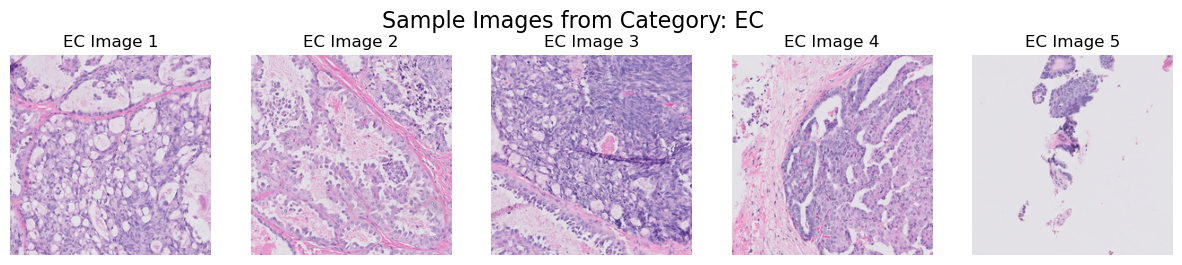

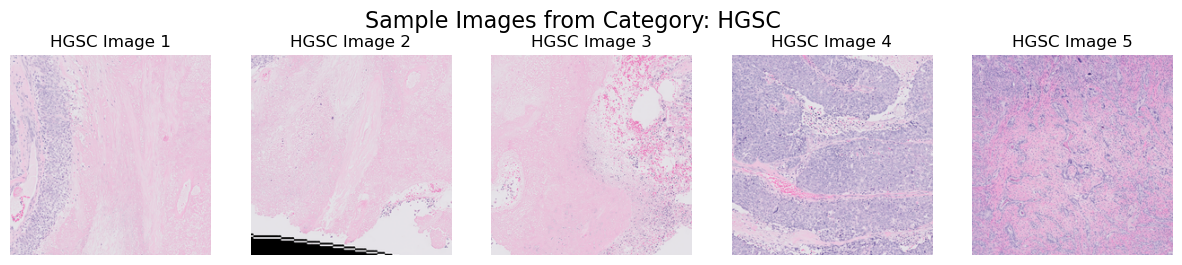

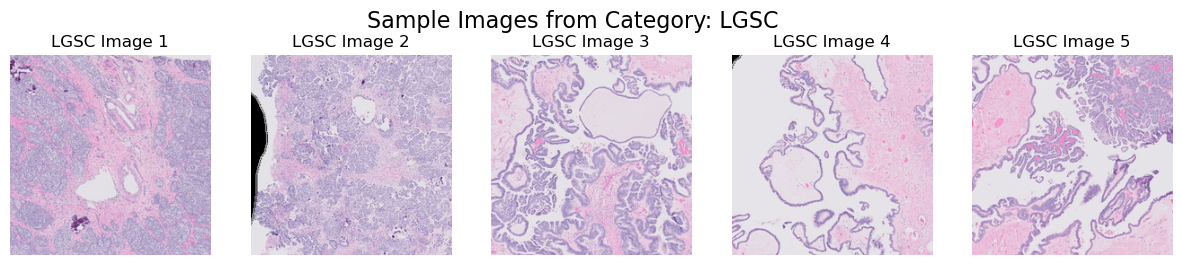

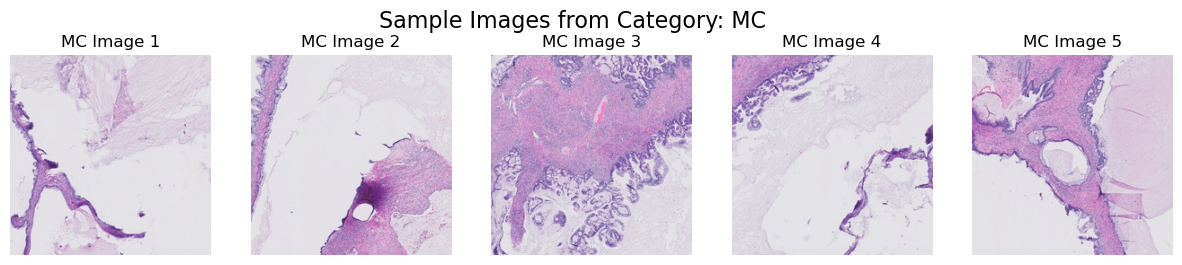

In [35]:
from PIL import Image

categories = os.listdir(dataset_path)

num_images = 5

for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)[:num_images]  

    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Sample Images from Category: {category}', fontsize=16)

    for i, image_name in enumerate(images):

        image_path = os.path.join(category_path, image_name)
        img = Image.open(image_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{category} Image {i+1}')

    plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [39]:
df = df[['file_path', 'category_encoded']]

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['file_path']], df['category_encoded'])

In [45]:
df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
df_resampled['category_encoded'] = y_resampled

In [47]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    1188
1    1188
2    1188
3    1188
4    1188
Name: count, dtype: int64


In [49]:
df_resampled

,file_path,category_encoded
0,data/ovarian-cancer-classification-dataset/Tes...,0
1,data/ovarian-cancer-classification-dataset/Tes...,0
2,data/ovarian-cancer-classification-dataset/Tes...,0
3,data/ovarian-cancer-classification-dataset/Tes...,0
4,data/ovarian-cancer-classification-dataset/Tes...,0
...,...,...
5935,data/ovarian-cancer-classification-dataset/Tes...,4
5936,data/ovarian-cancer-classification-dataset/Tes...,4
5937,data/ovarian-cancer-classification-dataset/Tes...,4
5938,data/ovarian-cancer-classification-dataset/Tes...,4


In [51]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [52]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [55]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='file_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='file_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='file_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 4752 validated image filenames belonging to 5 classes.
Found 594 validated image filenames belonging to 5 classes.
Found 594 validated image filenames belonging to 5 classes.


In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [61]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [63]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [65]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
      
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_inception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [69]:
total_train_batches = len(train_gen_new)  # Total batches in train generator
total_valid_batches = len(valid_gen_new)

In [71]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,  
    steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 456ms/step - accuracy: 0.1947 - loss: 2.3193 - val_accuracy: 0.4062 - val_loss: 1.2703
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.3370 - loss: 1.8542 - val_accuracy: 0.3125 - val_loss: 2.0280
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.3597 - loss: 1.7514 - val_accuracy: 0.2812 - val_loss: 1.9160


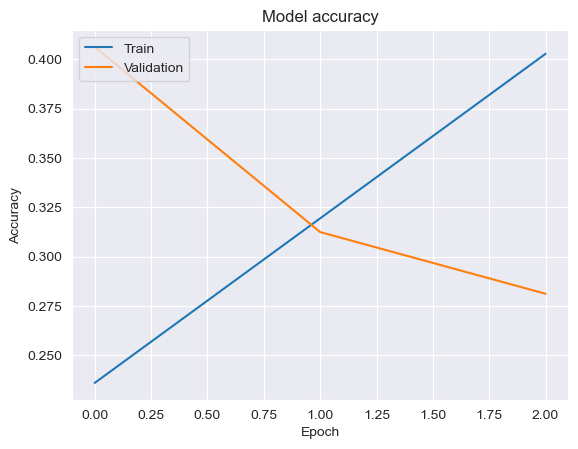

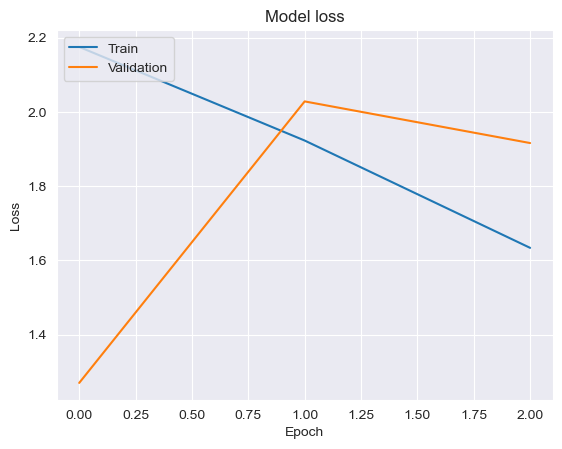

In [73]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [75]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 219ms/step


In [76]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.38      0.20      0.26       119
           1       0.23      0.08      0.12       119
           2       0.27      0.18      0.22       119
           3       0.29      0.45      0.35       119
           4       0.30      0.58      0.40       118

    accuracy                           0.30       594
   macro avg       0.29      0.30      0.27       594
weighted avg       0.29      0.30      0.27       594



In [77]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

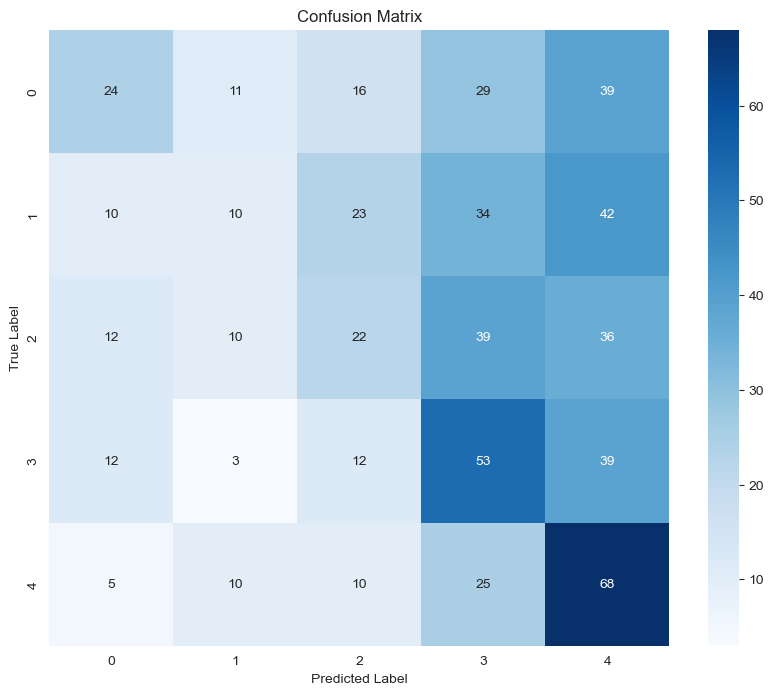

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [79]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_xception_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,

In [85]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,  
     steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 562ms/step - accuracy: 0.2005 - loss: 2.1414 - val_accuracy: 0.2812 - val_loss: 1.5961
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 511ms/step - accuracy: 0.2309 - loss: 1.9817 - val_accuracy: 0.3750 - val_loss: 1.5714
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 545ms/step - accuracy: 0.3220 - loss: 1.7382 - val_accuracy: 0.4062 - val_loss: 1.5140


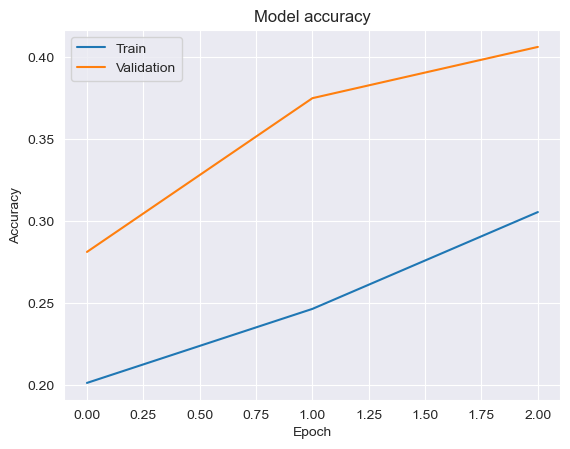

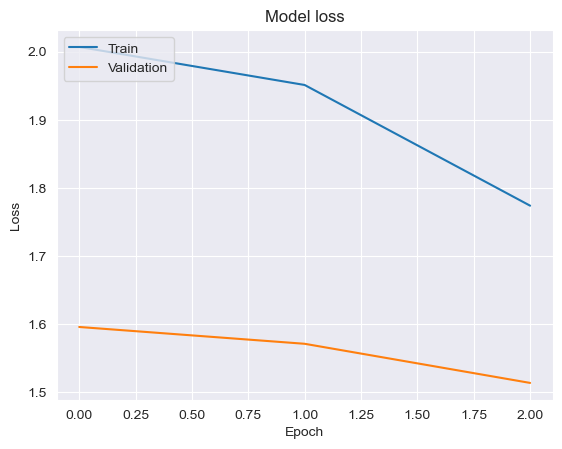

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [87]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step


In [88]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.32      0.10      0.15       119
           1       0.24      0.08      0.12       119
           2       0.32      0.57      0.41       119
           3       0.28      0.42      0.33       119
           4       0.38      0.38      0.38       118

    accuracy                           0.31       594
   macro avg       0.31      0.31      0.28       594
weighted avg       0.31      0.31      0.28       594



In [89]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

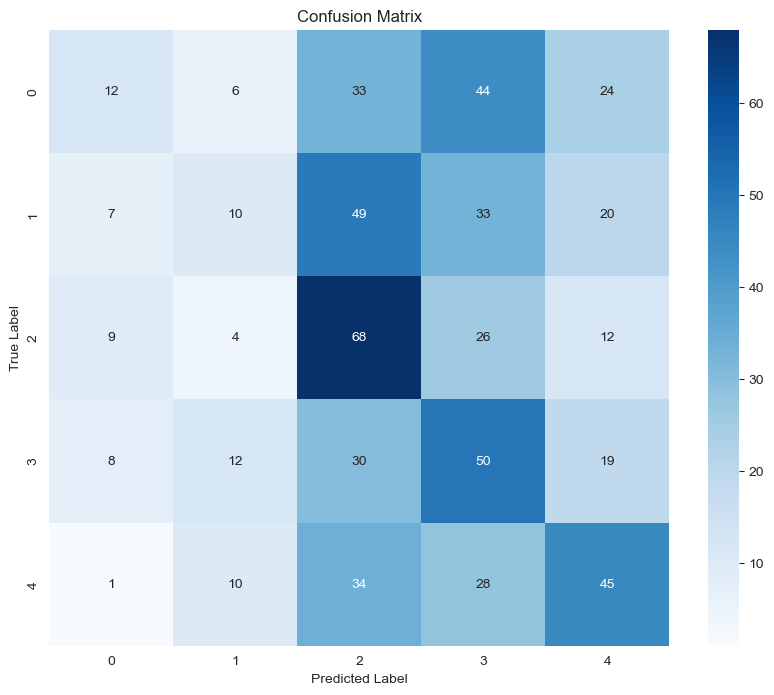

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [91]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, Reshape)
from tensorflow.keras.optimizers import Adam

class DifferentialAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(DifferentialAttention, self).__init__()
        self.num_heads = num_heads
        self.key_dim = key_dim
        
    def build(self, input_shape):
        self.query_dense = tf.keras.layers.Dense(self.key_dim)
        self.key_dense = tf.keras.layers.Dense(self.key_dim)
        self.value_dense = tf.keras.layers.Dense(self.key_dim)

    def call(self, x):
        Q = self.query_dense(x)
        K = self.key_dense(x)
        V = self.value_dense(x)
        
        attention_scores = tf.einsum('...ij,...kj->...ik', Q, K)  
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  
        
        sparse_attention = attention_scores * tf.cast((attention_scores > tf.reduce_mean(attention_scores)), tf.float32)
        
        output = tf.einsum('...ij,...jk->...ik', sparse_attention, V)
        
        return output

def create_mobilenet_model(input_shape):
    inputs = Input(shape=input_shape)
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    height, width, channels = 7, 7, 1024  
    x = Reshape((height * width, channels))(x)

    attention_output = DifferentialAttention(num_heads=8, key_dim=channels)(x)
    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(5, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
 steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,

In [99]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=3,  
    steps_per_epoch=total_train_batches // 16,  # Half the training batches
    validation_steps=total_valid_batches // 16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.2007 - loss: 2.2648 - val_accuracy: 0.2500 - val_loss: 1.8410
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.2946 - loss: 2.1348 - val_accuracy: 0.4062 - val_loss: 1.6845
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.3300 - loss: 1.7353 - val_accuracy: 0.4062 - val_loss: 1.3449


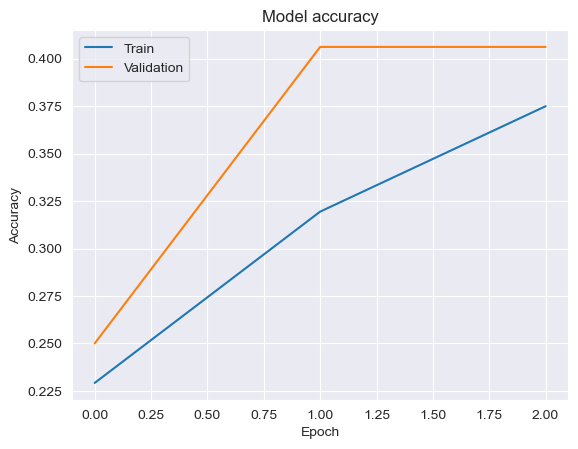

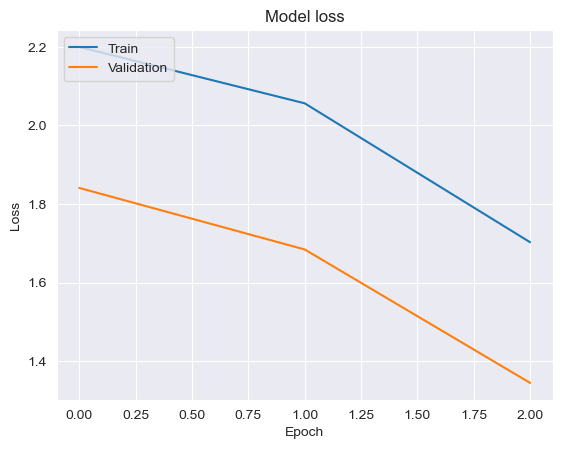

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [101]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step


In [102]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.26      0.69      0.37       119
           1       0.30      0.26      0.28       119
           2       0.47      0.07      0.12       119
           3       0.36      0.39      0.38       119
           4       0.70      0.14      0.23       118

    accuracy                           0.31       594
   macro avg       0.42      0.31      0.27       594
weighted avg       0.42      0.31      0.27       594



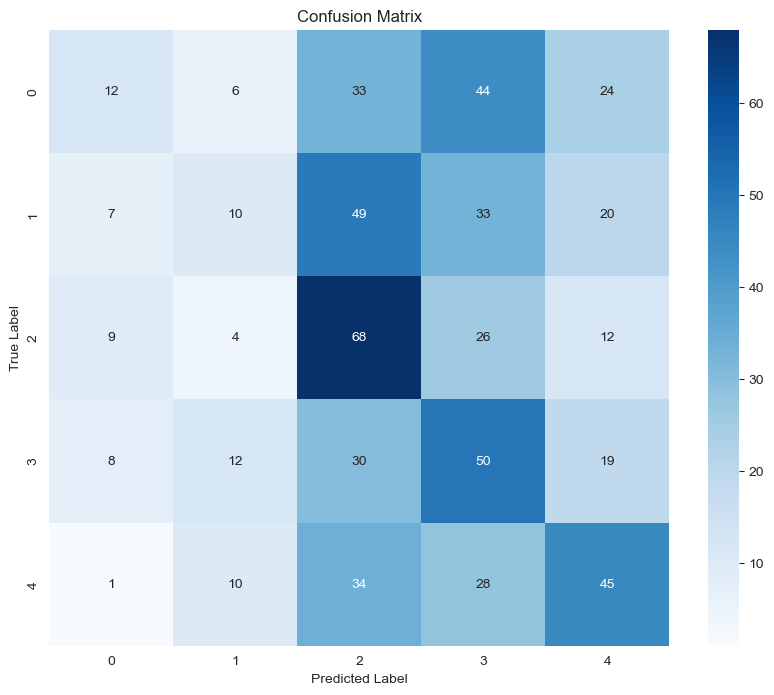

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

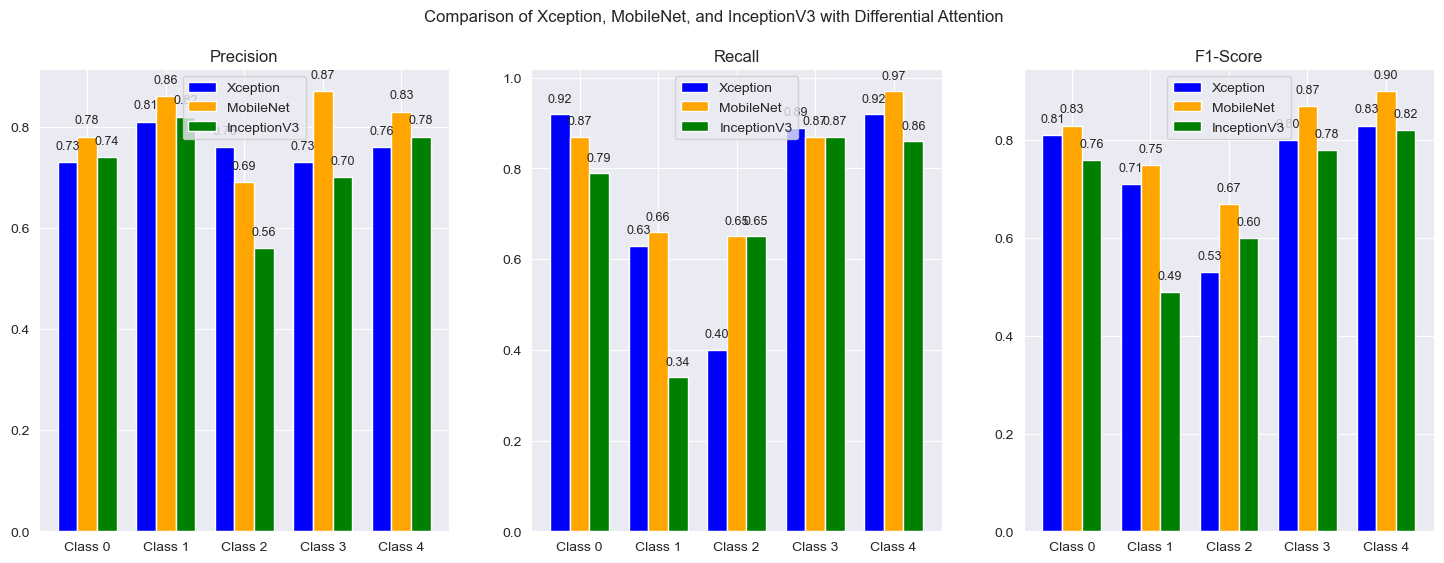

In [111]:
xception_metrics = {
    "precision": [0.73, 0.81, 0.76, 0.73, 0.76],
    "recall": [0.92, 0.63, 0.40, 0.89, 0.92],
    "f1-score": [0.81, 0.71, 0.53, 0.80, 0.83]
}

mobilenet_metrics = {
    "precision": [0.78, 0.86, 0.69, 0.87, 0.83],
    "recall": [0.87, 0.66, 0.65, 0.87, 0.97],
    "f1-score": [0.83, 0.75, 0.67, 0.87, 0.90]
}

inceptionv3_metrics = {
    "precision": [0.74, 0.82, 0.56, 0.70, 0.78],
    "recall": [0.79, 0.34, 0.65, 0.87, 0.86],
    "f1-score": [0.76, 0.49, 0.60, 0.78, 0.82]
}

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

bar_width = 0.25
x = np.arange(len(classes))

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparison of Xception, MobileNet, and InceptionV3 with Differential Attention")

def add_annotations(ax, data, x_positions):
    for i, v in enumerate(data):
        ax.text(x_positions[i], v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

axs[0].bar(x - bar_width, xception_metrics["precision"], width=bar_width, label="Xception", color='blue')
axs[0].bar(x, mobilenet_metrics["precision"], width=bar_width, label="MobileNet", color='orange')
axs[0].bar(x + bar_width, inceptionv3_metrics["precision"], width=bar_width, label="InceptionV3", color='green')
axs[0].set_title("Precision")
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes)
add_annotations(axs[0], xception_metrics["precision"], x - bar_width)
add_annotations(axs[0], mobilenet_metrics["precision"], x)
add_annotations(axs[0], inceptionv3_metrics["precision"], x + bar_width)
axs[0].legend()

axs[1].bar(x - bar_width, xception_metrics["recall"], width=bar_width, label="Xception", color='blue')
axs[1].bar(x, mobilenet_metrics["recall"], width=bar_width, label="MobileNet", color='orange')
axs[1].bar(x + bar_width, inceptionv3_metrics["recall"], width=bar_width, label="InceptionV3", color='green')
axs[1].set_title("Recall")
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes)
add_annotations(axs[1], xception_metrics["recall"], x - bar_width)
add_annotations(axs[1], mobilenet_metrics["recall"], x)
add_annotations(axs[1], inceptionv3_metrics["recall"], x + bar_width)
axs[1].legend()

axs[2].bar(x - bar_width, xception_metrics["f1-score"], width=bar_width, label="Xception", color='blue')
axs[2].bar(x, mobilenet_metrics["f1-score"], width=bar_width, label="MobileNet", color='orange')
axs[2].bar(x + bar_width, inceptionv3_metrics["f1-score"], width=bar_width, label="InceptionV3", color='green')
axs[2].set_title("F1-Score")
axs[2].set_xticks(x)
axs[2].set_xticklabels(classes)
add_annotations(axs[2], xception_metrics["f1-score"], x - bar_width)
add_annotations(axs[2], mobilenet_metrics["f1-score"], x)
add_annotations(axs[2], inceptionv3_metrics["f1-score"], x + bar_width)
axs[2].legend()

plt.show()